In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
from datetime import datetime

In [170]:
ratings = pd.read_csv("../full_Data/movie_lense/ratings.csv")

In [171]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## Avg Ratings Over Years

In [172]:
years = ratings.timestamp.apply(lambda x: datetime.fromtimestamp(x).year)

In [6]:
ratings['year'] = years

In [7]:
avg_rating = pd.DataFrame(ratings.groupby("year").rating.mean()).reset_index(drop = False)

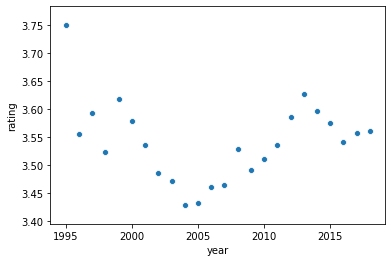

In [8]:
sns.scatterplot(data = avg_rating, x = 'year', y = 'rating')

In [9]:
datetime.fromtimestamp(ratings.timestamp.min()).month

1

In [10]:
## 

In [13]:
ratings

,userId,movieId,rating,timestamp,year
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009
...,...,...,...,...,...
27753439,283228,8542,4.5,1379882795,2013
27753440,283228,8712,4.5,1379882751,2013
27753441,283228,34405,4.5,1379882889,2013
27753442,283228,44761,4.5,1354159524,2012


In [18]:
#number of ratings made to each movie in each year.
num_ratings_per_movie_year = ratings.groupby(['movieId','year']).rating.count()

In [19]:
num_ratings_per_movie = num_ratings_per_movie_year.groupby('movieId').sum()

In [25]:
# the distrubution of counts of ratings made to each movie across years.
percentage_ratings_each_year_movie = num_ratings_per_movie_year/num_ratings_per_movie

In [26]:
percentage_ratings_each_year_movie.groupby('movieId').sum()

movieId
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
         ... 
193876    1.0
193878    1.0
193880    1.0
193882    1.0
193886    1.0
Name: rating, Length: 53889, dtype: float64

In [27]:
percentage_ratings_each_year_movie.head()

movieId  year
1        1996    0.124304
         1997    0.136149
         1998    0.015876
         1999    0.041771
         2000    0.060392
Name: rating, dtype: float64

In [29]:
num_years_lasted = percentage_ratings_each_year_movie.groupby('movieId').count()

In [51]:
#how many movies that have lasted so long
num_movies_per_years_lasted = num_years_lasted.reset_index(drop = False).groupby('rating').count().reset_index(drop=False).rename(columns={'rating':'num_years_lasted','movieId':'num_movies'})

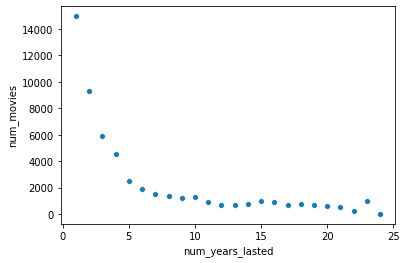

In [53]:
sns.scatterplot(data = num_movies_per_years_lasted, x = 'num_years_lasted', y = 'num_movies')

In [58]:
cutoff = 10
qualified_by_years_lasted = num_years_lasted[num_years_lasted > cutoff]

In [126]:
sampled_qualified_movies = qualified_by_years_lasted.sample(50)

In [128]:
percentage_of_ratings_cnt = percentage_ratings_each_year_movie.reset_index(drop = False).rename(columns={"rating":"percentage_of_ratings_cnt"})

In [129]:
percentage_of_ratings_cnt

,movieId,year,percentage_of_ratings_cnt
0,1,1996,0.124304
1,1,1997,0.136149
2,1,1998,0.015876
3,1,1999,0.041771
4,1,2000,0.060392
...,...,...,...
295187,193876,2018,1.000000
295188,193878,2018,1.000000
295189,193880,2018,1.000000
295190,193882,2018,1.000000


In [130]:
sampled_qualified_movies_full_info = percentage_of_ratings_cnt[percentage_of_ratings_cnt.movieId.isin(sampled_qualified_movies.index)]

In [131]:
sampled_qualified_movies_full_info.movieId.nunique()

50

In [132]:
sampled_qualified_movies_full_info.head()

,movieId,year,percentage_of_ratings_cnt
23,2,1996,0.254172
24,2,1997,0.026895
25,2,1998,0.019858
26,2,1999,0.035737
27,2,2000,0.052794


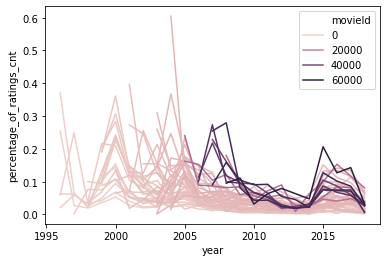

In [133]:
sns.lineplot(data=sampled_qualified_movies_full_info, x='year',y='percentage_of_ratings_cnt',hue='movieId')

## Feature Engineer

In [4]:
train_movies = pd.read_csv("../Cleaned Data/train_dataset.csv",index_col = 0)
train_movies['type'] = 'train'

In [5]:
test_movies = pd.read_csv("../Cleaned Data/test_dataset.csv",index_col = 0)
test_movies['type'] = 'test'

In [6]:
all_movies = pd.concat([train_movies,test_movies])

In [7]:
all_movies = all_movies.reset_index(drop=True)

In [8]:
all_movies.set_index('movie_id')

,category,year,count,mean,std,type
movie_id,,,,,,
1,3,1996,8526,4.119751,0.888026,train
2,1,1996,6900,3.574058,0.885957,train
3,1,1996,3303,3.424160,0.958047,train
4,1,1996,1364,3.049120,1.117364,train
5,1,1996,4136,3.345261,0.916458,train
...,...,...,...,...,...,...
53808,2,2013,8,2.125000,1.060660,test
53855,1,2011,8,2.937500,1.015505,test
53857,4,2012,3,2.666667,1.040833,test


In [9]:
movies_info = pd.read_csv("../Cleaned Data/movies_new.csv").drop(['year','movieId'], axis = 1)

In [10]:
movies = all_movies.join(movies_info, on = 'movie_id', how = 'left', sort = True)

In [11]:
movies = movies.rename({"title_new":"film"}, axis = 1)

In [12]:
movies

,category,movie_id,year,count,mean,std,type,gen,film
0,3,1,1996,8526,4.119751,0.888026,train,"['Adventure', 'Children', 'Fantasy']",Jumanji
1,1,2,1996,6900,3.574058,0.885957,train,"['Comedy', 'Romance']",Grumpier Old Men
2,1,3,1996,3303,3.424160,0.958047,train,"['Comedy', 'Drama', 'Romance']",Waiting to Exhale
3,1,4,1996,1364,3.049120,1.117364,train,['Comedy'],Father of the Bride Part II
4,1,5,1996,4136,3.345261,0.916458,train,"['Action', 'Crime', 'Thriller']",Heat
...,...,...,...,...,...,...,...,...,...
11940,2,53873,2013,8,2.562500,0.678101,test,['Comedy'],Les Ex
11187,4,53880,2009,8,2.812500,0.842509,train,['Comedy'],Tom Segura: Disgraceful
11188,4,53883,2008,6,4.333333,0.408248,train,"['Action', 'Animation', 'Crime', 'Mystery']",Lupin the Third vs. Detective Conan: The Movie
11941,4,53885,2013,8,4.062500,0.562996,test,['Documentary'],VHS Forever?: Psychotronic People


In [13]:
oscars = pd.read_csv("../Full_Data/the_oscar_award.csv")

In [14]:
oscars = oscars.groupby(['film']).winner.sum().to_frame().reset_index()

In [15]:
movies['film'] = movies['film'].apply(lambda x: str(x).strip())

In [16]:
oscars=oscars[oscars.film.notnull()]

In [17]:
oscars['film'] = oscars['film'].apply(lambda x: str(x).strip())

In [18]:
oscars

,film,winner
0,"$1,000 a Minute",0.0
1,'38',0.0
2,'Crocodile' Dundee,0.0
3,'Round Midnight,1.0
4,(A) Torzija [(A) Torsion],0.0
...,...,...
4828,the end,0.0
4829,tom thumb,1.0
4830,À Nous la Liberté,0.0
4831,Ådalen '31,0.0


In [19]:
merged_movies = movies.merge(oscars, left_on = 'film', right_on = 'film', how='left')

In [20]:
merged_movies

,category,movie_id,year,count,mean,std,type,gen,film,winner
0,3,1,1996,8526,4.119751,0.888026,train,"['Adventure', 'Children', 'Fantasy']",Jumanji,NaN
1,1,2,1996,6900,3.574058,0.885957,train,"['Comedy', 'Romance']",Grumpier Old Men,NaN
2,1,3,1996,3303,3.424160,0.958047,train,"['Comedy', 'Drama', 'Romance']",Waiting to Exhale,NaN
3,1,4,1996,1364,3.049120,1.117364,train,['Comedy'],Father of the Bride Part II,NaN
4,1,5,1996,4136,3.345261,0.916458,train,"['Action', 'Crime', 'Thriller']",Heat,NaN
...,...,...,...,...,...,...,...,...,...,...
11937,2,53873,2013,8,2.562500,0.678101,test,['Comedy'],Les Ex,NaN
11938,4,53880,2009,8,2.812500,0.842509,train,['Comedy'],Tom Segura: Disgraceful,NaN
11939,4,53883,2008,6,4.333333,0.408248,train,"['Action', 'Animation', 'Crime', 'Mystery']",Lupin the Third vs. Detective Conan: The Movie,NaN
11940,4,53885,2013,8,4.062500,0.562996,test,['Documentary'],VHS Forever?: Psychotronic People,NaN


In [21]:
## nan: not nominated
## >=0: number of oscar award won
merged_movies.winner.unique()

array([nan,  1.,  0.,  2.,  5.,  3.,  6.,  7.,  4.,  8.,  9., 11., 12.,
       10.])

In [22]:
movie_industry = pd.read_csv("../Full_Data/movie_industry.csv", encoding='iso-8859-1')

In [23]:
full_movies = merged_movies.merge(movie_industry[['budget', 'company', 'country', 'director', 'gross', 'name', 'rating', 'runtime', 'score', 'star', 'votes', 'writer', 'genre']], left_on = 'film', right_on = 'name', how = 'left')

In [24]:
full_movies = full_movies.rename({"score":"imdb_rating","votes":"imdb_votes_num",'genre':"imdb_genre"}, axis = 1)

In [25]:
full_movies.T

,0,1,2,3,4,5,6,7,8,9,...,12015,12016,12017,12018,12019,12020,12021,12022,12023,12024
category,3,1,1,1,1,1,3,3,1,1,...,4,4,1,4,2,2,4,4,4,3
movie_id,1,2,3,4,5,5,6,7,8,9,...,53851,53853,53855,53857,53859,53873,53880,53883,53885,53887
year,1996,1996,1996,1996,1996,1996,1996,1996,1996,1996,...,2010,2010,2011,2012,2010,2013,2009,2008,2013,2008
count,8526,6900,3303,1364,4136,4136,6041,3537,589,1490,...,4,3,8,3,30,8,8,6,8,59
mean,4.11975,3.57406,3.42416,3.04912,3.34526,3.34526,3.8151,3.56686,3.37012,3.22483,...,3.25,3,2.9375,2.66667,2.6,2.5625,2.8125,4.33333,4.0625,3.65254
std,0.888026,0.885957,0.958047,1.11736,0.916458,0.916458,0.897796,0.873575,0.966544,0.893105,...,1.32288,1.73205,1.0155,1.04083,0.865029,0.678101,0.842509,0.408248,0.562996,0.920337
type,train,train,train,train,train,train,train,train,train,train,...,train,train,test,test,train,test,train,train,test,train
gen,"['Adventure', 'Children', 'Fantasy']","['Comedy', 'Romance']","['Comedy', 'Drama', 'Romance']",['Comedy'],"['Action', 'Crime', 'Thriller']","['Action', 'Crime', 'Thriller']","['Comedy', 'Romance']","['Adventure', 'Children']",['Action'],"['Action', 'Adventure', 'Thriller']",...,['Horror'],['Drama'],['(no genres listed)'],['Drama'],['Drama'],['Comedy'],['Comedy'],"['Action', 'Animation', 'Crime', 'Mystery']",['Documentary'],"['Children', 'Drama']"
film,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,#Captured,"Bless You, Prison",A Futile & Stupid Gesture,The Firm,Christine,Les Ex,Tom Segura: Disgraceful,Lupin the Third vs. Detective Conan: The Movie,VHS Forever?: Psychotronic People,Family Party
winner,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# calculate the total grosses of the movie's company, director, star and writer before it is released
def cal_gross_before_release(series, industry_data):
    year = series.year
    qualified_data = industry_data[industry_data['year'] < year]
    company_gross = qualified_data[qualified_data['company'] == series.company].gross.sum()
    director_gross = qualified_data[qualified_data['director'] == series.director].gross.sum()
    star_gross = qualified_data[qualified_data['star'] == series.star].gross.sum()
    writer_gross = qualified_data[qualified_data['writer'] == series.writer].gross.sum()
    output = pd.Series({"company_gross":company_gross, "director_gross":director_gross, "star_gross":star_gross, "writer_gross":writer_gross})
    return series.append(output)

In [27]:
resulted_full_movie = full_movies.apply(lambda x: cal_gross_before_release(x, movie_industry), axis = 1)

In [28]:
resulted_full_movie.head()

,category,movie_id,year,count,mean,std,type,gen,film,winner,...,runtime,imdb_rating,star,imdb_votes_num,writer,imdb_genre,company_gross,director_gross,star_gross,writer_gross
0,3,1,1996,8526,4.119751,0.888026,train,"['Adventure', 'Children', 'Fantasy']",Jumanji,NaN,...,104.0,6.9,Robin Williams,232339.0,Jonathan Hensleigh,Action,1.540369e+09,277903477.0,610155945.0,200487748.0
1,1,2,1996,6900,3.574058,0.885957,train,"['Comedy', 'Romance']",Grumpier Old Men,NaN,...,101.0,6.6,Walter Matthau,20718.0,Mark Steven Johnson,Comedy,6.987000e+07,195164984.0,122782590.0,140042621.0
2,1,3,1996,3303,3.424160,0.958047,train,"['Comedy', 'Drama', 'Romance']",Waiting to Exhale,NaN,...,124.0,5.7,Whitney Houston,7977.0,Terry McMillan,Comedy,2.345456e+09,67052156.0,67052156.0,67052156.0
3,1,4,1996,1364,3.049120,1.117364,train,['Comedy'],Father of the Bride Part II,NaN,...,106.0,5.9,Steve Martin,28658.0,Albert Hackett,Comedy,8.128724e+07,223438450.0,581385078.0,76594000.0
4,1,5,1996,4136,3.345261,0.916458,train,"['Action', 'Crime', 'Thriller']",Heat,NaN,...,101.0,5.5,Burt Reynolds,1358.0,William Goldman,Action,2.793214e+06,2793214.0,43476427.0,36442543.0


In [29]:
final_result = resulted_full_movie.drop(['name'], axis = 1)

In [30]:
final_result.head().T

,0,1,2,3,4
category,3,1,1,1,1
movie_id,1,2,3,4,5
year,1996,1996,1996,1996,1996
count,8526,6900,3303,1364,4136
mean,4.11975,3.57406,3.42416,3.04912,3.34526
std,0.888026,0.885957,0.958047,1.11736,0.916458
type,train,train,train,train,train
gen,"['Adventure', 'Children', 'Fantasy']","['Comedy', 'Romance']","['Comedy', 'Drama', 'Romance']",['Comedy'],"['Action', 'Crime', 'Thriller']"
film,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat
winner,NaN,NaN,NaN,NaN,NaN


In [31]:
final_result.describe()

,category,movie_id,year,count,mean,std,winner,budget,gross,runtime,imdb_rating,imdb_votes_num,company_gross,director_gross,star_gross,writer_gross
count,12025.000000,12025.000000,12025.000000,12025.000000,12025.000000,11482.000000,1228.000000,2.788000e+03,2.788000e+03,2788.000000,2788.000000,2.788000e+03,1.202500e+04,1.202500e+04,1.202500e+04,1.202500e+04
mean,2.590686,14046.288233,2002.843659,243.717505,3.191663,0.943530,0.789902,2.275922e+07,3.252732e+07,106.409971,6.272489,5.806119e+04,3.700999e+08,2.537902e+07,4.420387e+07,1.240109e+07
std,1.162716,15887.731949,4.658748,1207.528625,0.642901,0.299093,1.506247,3.129084e+07,5.289619e+07,18.204638,0.977141,1.164569e+05,1.347127e+09,1.018562e+08,1.744303e+08,6.665169e+07
min,1.000000,1.000000,1995.000000,1.000000,0.500000,0.000000,0.000000,0.000000e+00,1.242000e+03,50.000000,2.100000,1.390000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,3057.000000,1999.000000,7.000000,2.836879,0.788389,0.000000,0.000000e+00,3.410145e+06,95.000000,5.700000,6.211250e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000,6050.000000,2003.000000,29.000000,3.285714,0.943652,0.000000,1.200000e+07,1.457781e+07,102.000000,6.300000,1.877800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000,26606.000000,2006.000000,113.000000,3.634409,1.098915,1.000000,3.043750e+07,3.947050e+07,114.000000,7.000000,5.693625e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000,53887.000000,2017.000000,25760.000000,5.000000,3.181981,12.000000,2.500000e+08,6.586723e+08,271.000000,8.900000,1.492073e+06,1.860904e+10,1.746553e+09,2.952621e+09,1.370768e+09


In [32]:
## Column Writeup:
## category: the y that we're trying to predict: 1,2,3,4
## movie_id: unique identifier of the movie in movie_lense
## year: the year that the movie was released
## count: total number of ratings on the movie
## mean: rating mean
## std: rating standard deviation
## winner: how many oscar awards that the movie has won. Nan values means that it is not even nominated
## budget: budget of the movie
## gross: gross income of the movie
## runtime: length of the movie
## imdb_rating: rating of the movie on imdb
## imdb_votes_num: total number of ratings on the movie on imdb
## company_gross: the movie's producer's total income before the release of this movie.
## director_gross: the movie's director's total income before the release of this movie.
## star_gross: the movie's star's total income before the release of this movie.
## writer_gross: the movie's writer's total income before the release of this movie.

In [35]:
train_after_feature_eng = final_result[final_result.type=='train']
test_after_feature_eng = final_result[final_result.type=='test']

In [36]:
train_after_feature_eng.to_csv("../Cleaned Data/train_data_after_feature_eng.csv")
test_after_feature_eng.to_csv("../Cleaned Data/test_data_after_feature_eng.csv")